In [153]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import random                                #random song recommandation
from Levenshtein import ratio               # similarity ratio
from config import client_id, client_secret
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import pprint
from IPython.display import IFrame

<h2> Dataframe Top_100 </h2>

In [3]:
# 1. Get top 100 and create Dataframe with artists & titles

In [4]:
url = "https://www.billboard.com/charts/hot-100/"

response = requests.get(url)
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
else:
    print(f"Error: {response.status_code}")

In [5]:
#artists
soup.find_all("span", class_="c-label")

[<span class="c-label a-font-primary-bold-xxl lrv-u-padding-lr-1 lrv-u-padding-t-025">
 	
 	1
 </span>,
 <span class="c-label a-font-primary-bold-xxl lrv-u-padding-lr-1 lrv-u-padding-t-025">
 	
 	18
 </span>,
 <span class="c-label a-font-primary-bold-xxl lrv-u-padding-lr-1 lrv-u-padding-t-025">
 	
 	31
 </span>,
 <span class="c-label a-font-primary-bold-l u-font-size-32@tablet u-letter-spacing-0080@tablet">
 	
 	1
 </span>,
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
 	
 	Shaboozey
 </span>,
 <span class="c-label a-font-primary-bold-l a-font-primary-m@mobile-max u-font-weight-normal@mobile-max lrv-u-padding-tb-050@mobile-max u-font-size-32@tablet">
 	
 	1
 </span>,
 <span class="c-label a-font-primary-bold-l a-font-primary-m@mobile-max u-font-weight-normal@mobile-max lrv-u-padding-tb

In [14]:
artists=[]
for a in soup.select("span.c-label.a-no-trucate"):
    artists.append(a.get_text(strip=True))
artists

['Shaboozey',
 'Lady Gaga & Bruno Mars',
 'Billie Eilish',
 'Sabrina Carpenter',
 'Teddy Swims',
 'Gracie Abrams',
 'Post Malone Featuring Morgan Wallen',
 'Sabrina Carpenter',
 'Benson Boone',
 'Morgan Wallen',
 'Chappell Roan',
 'Hozier',
 'ROSE & Bruno Mars',
 'The Weeknd & Playboi Carti',
 'Sabrina Carpenter',
 'Kendrick Lamar',
 'Tyler, The Creator Featuring GloRilla, Sexyy Red & Lil Wayne',
 'Jelly Roll',
 'Morgan Wallen',
 'Myles Smith',
 'Chappell Roan',
 'Gigi Perez',
 'Tyler, The Creator Featuring Daniel Caesar',
 'Oscar Maydon & Fuerza Regida',
 'Billie Eilish',
 'GloRilla & Sexyy Red',
 'Gracie Abrams',
 'Tommy Richman',
 'Zach Bryan',
 'Sabrina Carpenter',
 'Teddy Swims',
 'Marshmello & Kane Brown',
 'Zach Bryan',
 'Koe Wetzel & Jessie Murph',
 'Ella Langley Featuring Riley Green',
 'GloRilla',
 'Morgan Wallen Featuring ERNEST',
 'Wham!',
 'Luke Combs',
 'Tucker Wetmore',
 'Taylor Swift',
 'Dasha',
 'Tyler, The Creator Featuring Teezo Touchdown',
 'Chappell Roan',
 'Jimin'

In [ ]:
#titles
#soup.find_all(class_ = 'o-chart-results-list-row-container')                # find all containers

In [6]:
titles = []
for title in soup.find_all(class_ = 'o-chart-results-list-row-container'):     #above h3
   titles.append(title.h3.get_text(strip = True))
titles

['A Bar Song (Tipsy)',
 'Die With A Smile',
 'Birds Of A Feather',
 'Espresso',
 'Lose Control',
 "That's So True",
 'I Had Some Help',
 'Taste',
 'Beautiful Things',
 'Love Somebody',
 'Good Luck, Babe!',
 'Too Sweet',
 'APT.',
 'Timeless',
 'Please Please Please',
 'Not Like Us',
 'Sticky',
 'I Am Not Okay',
 'Lies Lies Lies',
 'Stargazing',
 'Hot To Go!',
 'Sailor Song',
 'St. Chroma',
 'Tu Boda',
 'Wildflower',
 'Whatchu Kno About Me',
 "I Love You, I'm Sorry",
 'Million Dollar Baby',
 'High Road',
 'Bed Chem',
 'The Door',
 'Miles On It',
 'Pink Skies',
 'High Road',
 'You Look Like You Love Me',
 'TGIF',
 'Cowgirls',
 'Last Christmas',
 "Ain't No Love In Oklahoma",
 "Wind Up Missin' You",
 'I Can Do It With A Broken Heart',
 'Austin',
 'Darling, I',
 'Pink Pony Club',
 'Who',
 'Like Him',
 'Help Me',
 'Rah Tah Tah',
 "This World's A Giant",
 'Kehlani',
 'Hard Fought Hallelujah',
 'Dancing In The Flames',
 'Beautiful As You',
 'Dos Dias',
 "It's Ok I'm Ok",
 'Disease',
 '25',
 'I 

In [16]:
# create Dataframe 

df= pd.DataFrame({
    "Titles": titles,
    "Artists": artists})
df

,Titles,Artists
0,A Bar Song (Tipsy),Shaboozey
1,Die With A Smile,Lady Gaga & Bruno Mars
2,Birds Of A Feather,Billie Eilish
3,Espresso,Sabrina Carpenter
4,Lose Control,Teddy Swims
...,...,...
95,Prove It,21 Savage & Summer Walker
96,4x4xU,Lainey Wilson
97,I Ain't Sayin',Jordan Davis
98,The Largest,BigXthaPlug


In [24]:
#df.to_csv("df_hot_100.csv", index=False)

In [26]:
# Create a Python program that takes a user input, checks if it is present in your scraped DataFrame

In [18]:
print("You can type 'exit' at any time to quit.")
while True:
    user_input = input("Please enter a song: ").strip()
    # Exit Condition!
    if user_input.lower() == "exit":
        print("Goodbye!")
        break
    if user_input in df["Titles"].values:
        random_song = df.sample(1)["Titles"].iloc[0]                                  #randomly one row
        print(f"Your song is popular! Here's another suggestion: '{random_song}'")
    else:
        print("Sorry, your song is not hot enough.")

You can type 'exit' at any time to quit.


Please enter a song:  Die with a smile


Sorry, your song is not hot enough.


Please enter a song:  Die With A Smile


Your song is popular! Here's another suggestion: 'Mamushi'


Please enter a song:  exit


Goodbye!


In [ ]:
# Handling Typos
#!pip install python-Levenshtein
"""The Levenshtein algorithm measures how many operations (insertion, deletion, or substitution) are required to transform one string into another.
The result is a similarity score ranging from 0 (no similarity) to 1 (identical). If the similarity of a title exceeds the current best_score, that title is stored as the new best_match."""

In [22]:
print("You can type 'exit' at any time to quit.")
while True:
    user_input = input("Please enter a song: ").strip()
    if user_input.lower() == "exit":
        print("Goodbye!")
        break
                                                                # Levenshtein
    best_match = None
    best_score = 0
    
    for title in df["Titles"]:
        similarity = ratio(user_input, title)       # calculates similarity between 0 and 1
        if similarity > best_score:
            best_score = similarity
            best_match = title

    # check if similarity is high enough 
    if best_score >= 0.99:
        random_song = df.sample(1)["Titles"].iloc[0]
        print(f"It's hot! Here's is another suggestion: '{random_song}'")
    elif best_score >= 0.60:                                     # similarity treshhold: 60 % ?
        random_song = df.sample(1)["Titles"].iloc[0]  
        print(f"Did you mean '{best_match}'? It's in the list! Here's another suggestion: '{random_song}'")
    else:
        print("Sorry, your song is not hot enough.")

You can type 'exit' at any time to quit.


Please enter a song:  espreso


Did you mean 'Espresso'? It's in the list! Here's another suggestion: 'For Me'


Please enter a song:  exit


Goodbye!


In [ ]:
# Embedded track player 

In [24]:
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [26]:
def get_spotify_id(title, artist):
    query = f"track:{title} artist:{artist}"
    result = sp.search(query, type="track", limit=1)
    if result['tracks']['items']:
        return result['tracks']['items'][0]['id']  # Track-ID
    else:
        return None  

In [28]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

In [40]:
print("You can type 'exit' at any time to quit.")
while True:
    user_input = input("Please enter a song: ").strip()
    if user_input.lower() == "exit":
        print("Goodbye!")
        break

    best_match = None
    best_score = 0
    best_artist = None

    for index, row in df.iterrows():
        title = row["Titles"]
        artist = row["Artists"]
        similarity = ratio(user_input.lower(), title.lower())  # Berechnet die Ähnlichkeit
        if similarity > best_score:
            best_score = similarity
            best_match = title
            best_artist = artist

  
    if best_score >= 0.99: 
        track_id = get_spotify_id(best_match, best_artist)
        if track_id:
            print(f"Playing '{best_match}' by {best_artist}!")
            display(play_song(track_id))
        else:
            print(f"Sorry, no Spotify link found for '{best_match}'.")
    elif best_score >= 0.6:
        random_row = df.sample(1).iloc[0]
        random_song = random_row["Titles"]
        random_artist = random_row["Artists"]
        track_id = get_spotify_id(random_song, random_artist)
        if track_id:
            print(f"Did you mean '{best_match}'? Here's another suggestion: '{random_song}' by {random_artist}. Playing it now!")
            display(play_song(track_id))
        else:
            print(f"Sorry, no Spotify link found for '{best_match}'.")
    else:
        print("Sorry, your song is not hot enough.")

You can type 'exit' at any time to quit.


Please enter a song:  espreso


Did you mean 'Espresso'? Here's another suggestion: 'Judge Judy' by Tyler, The Creator. Playing it now!


Please enter a song:  exit


Goodbye!


<h2> Dataframe Audio_features </h2>

In [ ]:
# Using the Spotipy library, create a DataFrame storing the audio_features of at least 1000 songs.

In [ ]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))

In [42]:
# pprint.pprint(results)

In [44]:
# Embedded track player

In [44]:
track_id = '3WMbD1OyfKuwWDWMNbPQ4g'                           # -> def play_song(track:_id)
#track_id= 'spotify:track:3hgl7EQwTutSm6PESsB7gZ'
IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [ ]:
# MOST POPULAR GENRES https://blog.novecore.com/top-10-most-popular-music-genres/

In [46]:
# Define get playlist function

def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [48]:
# 1. POP

In [50]:
"""# find playlist id searching a playlist copy fromn url 
for playlist in result playlist itrms
    print playlist id 
results[playlist][items][0][id] """

'# find playlist id searching a playlist copy fromn url \nfor playlist in result playlist itrms\n    print playlist id \nresults[playlist][items][0][id] '

In [52]:
pop_playlist_tracks = get_playlist_tracks("Spotify","6mtYuOxzl58vSGnEDtZ9uB")

In [ ]:
pop_ids = []
for i in pop_playlist_tracks:
    pop_ids.append(i['track']['id'])

In [ ]:
chunk_size = 100
pop_ids_chopped = [pop_ids[i:i+chunk_size] for i in range(0,len(pop_ids), 100)]

In [ ]:
#pop_ids_chopped

In [ ]:
pop_af = []
for i in pop_ids_chopped:
    pop_af.extend(sp.audio_features(i))
pd.DataFrame(pop_af)

In [ ]:
pop_af = pd.DataFrame(pop_af)
#pop_af.to_csv("pop.csv", index=False) 

In [ ]:
# 2. ROCK 

In [ ]:
rock_playlist_tracks = get_playlist_tracks("Spotify","3sTZTkIGgm8wJiSXDvpApF")

In [ ]:
rock_ids = []
for i in rock_playlist_tracks:
    rock_ids.append(i['track']['id'])

In [ ]:
chunk_size = 100
rock_ids_chopped = [rock_ids[i:i+chunk_size] for i in range(0,len(rock_ids), 100)]

In [ ]:
rock_af = []
for i in rock_ids_chopped:
    rock_af.extend(sp.audio_features(i))
pd.DataFrame(rock_af).head(3)

In [ ]:
rock_af = pd.DataFrame(rock_af)
#rock_af.to_csv("rock.csv", index=False) 

In [ ]:
# 3. HipHop

In [ ]:
hop_playlist_tracks = get_playlist_tracks("Spotify","56un2laj6rmMUKhDlkUkAY")

In [ ]:
hop_ids = []
for i in hop_playlist_tracks:
    hop_ids.append(i['track']['id'])

In [ ]:
chunk_size = 100
hop_ids_chopped = [hop_ids[i:i+chunk_size] for i in range(0,len(hop_ids), 100)]

In [ ]:
hop_af = []
for i in hop_ids_chopped:
    hop_af.extend(sp.audio_features(i))
pd.DataFrame(hop_af).head(3)

In [ ]:
hop_af = pd.DataFrame(hop_af)
#hop_af.to_csv("hop.csv", index=False) 

In [ ]:
# 4. R&B 

In [ ]:
rb_playlist_tracks = get_playlist_tracks("Spotify","3a9yodm1vqcU6JULLBeZeA")

In [ ]:
rb_ids = []
for i in rb_playlist_tracks:
    rb_ids.append(i['track']['id'])

In [ ]:
chunk_size = 100
rb_ids_chopped = [rb_ids[i:i+chunk_size] for i in range(0,len(hop_ids), 100)]

In [ ]:
rb_af = []
for i in rb_ids_chopped:
    rb_af.extend(sp.audio_features(i))
pd.DataFrame(rb_af).head(3)

In [ ]:
rb_af = pd.DataFrame(rb_af)
#rb_af.to_csv("rb.csv", index=False) 

In [ ]:
# 5. EDM

In [ ]:
edm_playlist_tracks = get_playlist_tracks("Spotify","1lS6v9h4MXOw6f6y8MkS8w")

In [ ]:
edm_ids = []
for i in edm_playlist_tracks:
    edm_ids.append(i['track']['id'])

In [ ]:
edm_af = []
for i in edm_ids:
    edm_af.extend(sp.audio_features(i))
pd.DataFrame(edm_af).head(3)

In [ ]:
edm_af = pd.DataFrame(edm_af)
#edm_af.to_csv("edm.csv", index=False) 

In [ ]:
# 6. Country 

In [ ]:
cn_playlist_tracks = get_playlist_tracks("Spotify","37i9dQZF1DWZBCPUIUs2iR")

In [ ]:
cn_ids = []
for i in cn_playlist_tracks:
    cn_ids.append(i['track']['id'])

In [ ]:
cn_af = []
for i in cn_ids:
    cn_af.extend(sp.audio_features(i))
pd.DataFrame(cn_af).head(3)

In [ ]:
cn_af = pd.DataFrame(cn_af)
#cn_af.to_csv("cn.csv", index=False) 

In [ ]:
# 7. Jazz 

In [ ]:
jz_playlist_tracks = get_playlist_tracks("Spotify","37i9dQZF1DXbITWG1ZJKYt")

In [ ]:
jz_ids = []
for i in jz_playlist_tracks:
    jz_ids.append(i['track']['id'])

In [ ]:
chunk_size = 100
jz_ids_chopped = [jz_ids[i:i+chunk_size] for i in range(0,len(jz_ids), 100)]

In [ ]:
jz_af = []
for i in jz_ids_chopped:
    jz_af.extend(sp.audio_features(i))
pd.DataFrame(jz_af).head(3)

In [ ]:
jz_af = pd.DataFrame(jz_af)
#jz_af.to_csv("jz.csv", index=False) 

In [ ]:
# 8. Raeggae 

In [ ]:
rg_playlist_tracks = get_playlist_tracks("Spotify","0uKEs5Je7unyIpYlK9d320")

In [ ]:
rg_ids = []
for i in rg_playlist_tracks:
    rg_ids.append(i['track']['id'])

In [ ]:
chunk_size = 100
rg_ids_chopped = [rg_ids[i:i+chunk_size] for i in range(0,len(rg_ids), 100)]

In [ ]:
rg_af = []
for i in rg_ids_chopped:
    rg_af.extend(sp.audio_features(i))
pd.DataFrame(rg_af).head(3)

In [ ]:
rg_af = pd.DataFrame(rg_af)
#rg_af.to_csv("rg.csv", index=False) 

In [ ]:
# 9. Latin

In [ ]:
ln_playlist_tracks = get_playlist_tracks("Spotify","47lKGlxoijn8lJyWcNBwEW")

In [ ]:
ln_ids = []
for i in ln_playlist_tracks:
    ln_ids.append(i['track']['id'])

In [ ]:
ln_af = []
for i in ln_ids:
    ln_af.extend(sp.audio_features(i))
pd.DataFrame(ln_af).head(3)

In [ ]:
ln_af = pd.DataFrame(ln_af)
#ln_af.to_csv("ln.csv", index=False) 

In [ ]:
# 10. Classical 

In [ ]:
cl_playlist_tracks = get_playlist_tracks("Spotify","1DSEi0lvLOzTiKqnaYZBDh")

In [ ]:
cl_ids = []
for i in cl_playlist_tracks:
    cl_ids.append(i['track']['id'])

In [ ]:
cl_af = []
for i in cl_ids:
    cl_af.extend(sp.audio_features(i))
pd.DataFrame(cl_af).head(3)

In [ ]:
cl_af = pd.DataFrame(cl_af)
#cl_af.to_csv("cl.csv", index=False) 

In [ ]:
# 11. Techno

In [ ]:
tn_playlist_tracks = get_playlist_tracks("Spotify","37i9dQZF1DX6J5NfMJS675")

In [ ]:
tn_ids = []
for i in tn_playlist_tracks:
    tn_ids.append(i['track']['id'])

In [ ]:
chunk_size = 100
tn_ids_chopped = [tn_ids[i:i+chunk_size] for i in range(0,len(tn_ids), 100)]

In [ ]:
tn_af = []
for i in tn_ids_chopped:
    tn_af.extend(sp.audio_features(i))
pd.DataFrame(tn_af).head(3)

In [ ]:
tn_af = pd.DataFrame(tn_af)
#tn_af.to_csv("tn.csv", index=False) 

In [ ]:
# 12. Deutschrap

In [ ]:
dr_playlist_tracks = get_playlist_tracks("Spotify","37i9dQZF1DWSzguhfGl55y")

In [ ]:
dr_ids = []
for i in dr_playlist_tracks:
    dr_ids.append(i['track']['id'])

In [ ]:
dr_af = []
for i in dr_ids:
    dr_af.extend(sp.audio_features(i))
pd.DataFrame(dr_af).head(3)

In [ ]:
dr_af = pd.DataFrame(dr_af)
#dr_af.to_csv("dr.csv", index=False) 

In [ ]:
# 13. Metal

In [ ]:
mt_playlist_tracks = get_playlist_tracks("Spotify","37i9dQZF1EQpgT26jgbgRI")

In [ ]:
mt_ids = []
for i in mt_playlist_tracks:
    mt_ids.append(i['track']['id'])

In [ ]:
mt_af = []
for i in mt_ids:
    mt_af.extend(sp.audio_features(i))
pd.DataFrame(mt_af).head(3)

In [ ]:
mt_af = pd.DataFrame(mt_af)
#mt_af.to_csv("mt.csv", index=False) 

In [ ]:
# 14. Indie

In [ ]:
ind_playlist_tracks = get_playlist_tracks("Spotify","37i9dQZF1DWYJeWl6ior4d")

In [ ]:
ind_ids = []
for i in ind_playlist_tracks:
    ind_ids.append(i['track']['id'])

In [ ]:
ind_af = []
for i in ind_ids:
    ind_af.extend(sp.audio_features(i))
pd.DataFrame(ind_af).head(3)

In [ ]:
ind_af = pd.DataFrame(ind_af)
#ind_af.to_csv("ind.csv", index=False) 

In [ ]:
# 15 Downtempo

In [ ]:
dt_playlist_tracks = get_playlist_tracks("Spotify","57uN4exPbSwPc4K3Fwx1vw")

In [ ]:
dt_ids = []
for i in dt_playlist_tracks:
    dt_ids.append(i['track']['id'])

In [ ]:
chunk_size = 100
dt_ids_chopped = [dt_ids[i:i+chunk_size] for i in range(0,len(dt_ids), 100)]

In [ ]:
dt_af = []
for i in dt_ids_chopped:
    dt_af.extend(sp.audio_features(i))
pd.DataFrame(dt_af).head(3)

In [ ]:
dt_af = pd.DataFrame(dt_af)
#dt_af.to_csv("dt.csv", index=False) 

In [ ]:
# 16 Soundtracks

In [ ]:
st_playlist_tracks = get_playlist_tracks("Spotify","37i9dQZF1DX8C9xQcOrE6T")

In [ ]:
st_ids = []
for i in st_playlist_tracks:
    st_ids.append(i['track']['id'])

In [ ]:
chunk_size = 100
st_ids_chopped = [st_ids[i:i+chunk_size] for i in range(0,len(st_ids), 100)]

In [ ]:
st_af = []
for i in st_ids_chopped:
    st_af.extend(sp.audio_features(i))
pd.DataFrame(st_af).head(3)

In [ ]:
st_af = pd.DataFrame(st_af)
#st_af.to_csv("st.csv", index=False) 

In [ ]:
# 17. mixed playlist 

In [ ]:
mx_playlist_tracks = get_playlist_tracks("Spotify","3ARGWPi5zf8sfl86RhG1UB")

In [ ]:
mx_ids = []
for i in mx_playlist_tracks:
    mx_ids.append(i['track']['id'])

In [ ]:
chunk_size = 100
mx_ids_chopped = [mx_ids[i:i+chunk_size] for i in range(0,len(mx_ids), 100)]

In [ ]:
mx_af = []
for i in mx_ids_chopped:
    mx_af.extend(sp.audio_features(i))
pd.DataFrame(mx_af).head(3)

In [ ]:
mx_af = pd.DataFrame(mx_af)
#mx_af.to_csv("mx.csv", index=False) 

In [ ]:
# 18. Oldies

In [ ]:
old_playlist_tracks = get_playlist_tracks("Spotify","37i9dQZF1DX56bqlsMxJYR")

In [ ]:
old_ids = []
for i in old_playlist_tracks:
    old_ids.append(i['track']['id'])

In [ ]:
chunk_size = 100
old_ids_chopped = [old_ids[i:i+chunk_size] for i in range(0,len(old_ids), 100)]

In [ ]:
old_af = []
for i in old_ids_chopped:
    old_af.extend(sp.audio_features(i))
pd.DataFrame(old_af).head(3)

In [ ]:
old_af = pd.DataFrame(old_af)
#old_af.to_csv("old.csv", index=False) 

In [ ]:
# 19. New

In [ ]:
new_playlist_tracks = get_playlist_tracks("Spotify","37i9dQZF1DX4JAvHpjipBk")

In [ ]:
new_ids = []
for i in new_playlist_tracks:
    new_ids.append(i['track']['id'])

In [ ]:
new_af = []
for i in new_ids:
    new_af.extend(sp.audio_features(i))
pd.DataFrame(new_af).head(3)

In [ ]:
new_af = pd.DataFrame(new_af)
#new_af.to_csv("new.csv", index=False) 

In [ ]:
# 20. Mixed2024

In [ ]:
m2_playlist_tracks = get_playlist_tracks("Spotify","2DpRAKsc8kVq3GaZ9LKaoC")

In [ ]:
m2_ids = []
for i in m2_playlist_tracks:
    m2_ids.append(i['track']['id'])

In [ ]:
chunk_size = 100
m2_ids_chopped = [m2_ids[i:i+chunk_size] for i in range(0,len(m2_ids), 100)]

In [ ]:
m2_af = []
for i in m2_ids_chopped:
    m2_af.extend(sp.audio_features(i))
pd.DataFrame(m2_af).head(3)

In [ ]:
m2_af = pd.DataFrame(m2_af)
#m2_af.to_csv("m2.csv", index=False) 

In [ ]:
# Combine Dataframes

In [ ]:
dataframes = [pop_af, rock_af, hop_af, rb_af, edm_af, cn_af, jz_af, rg_af, ln_af, cl_af, tn_af, dr_af, mt_af, ind_af, dt_af, st_af, mx_af, old_af, new_af, m2_af]
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df

In [ ]:
#combined_df.duplicated().sum()
#combined_df = combined_df.drop_duplicates()

In [ ]:
#combined_df.to_csv("combined_df.csv", index=False) 

In [58]:
combined_df.columns    #https://developer.spotify.com/documentation/web-api/reference/get-audio-features 

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [83]:
file_path='/Users/ironhack/Documents/GitHub/Song-Recommandation/combined_df.csv'
combined_df = pd.read_csv(file_path)
combined_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.623,0.734,9,-5.948,1,0.1070,0.01620,0.000002,0.1450,0.370,107.853,audio_features,76FZM38RC8XaAjJ77CVTNe,spotify:track:76FZM38RC8XaAjJ77CVTNe,https://api.spotify.com/v1/tracks/76FZM38RC8Xa...,https://api.spotify.com/v1/audio-analysis/76FZ...,244453,4
1,0.722,0.851,7,-3.873,0,0.0639,0.03190,0.000000,0.1080,0.452,126.885,audio_features,5yDL13y5giogKs2fSNf7sj,spotify:track:5yDL13y5giogKs2fSNf7sj,https://api.spotify.com/v1/tracks/5yDL13y5giog...,https://api.spotify.com/v1/audio-analysis/5yDL...,197936,4
2,0.647,0.585,6,-6.123,1,0.0512,0.00314,0.000000,0.1650,0.353,131.934,audio_features,5jrdCoLpJSvHHorevXBATy,spotify:track:5jrdCoLpJSvHHorevXBATy,https://api.spotify.com/v1/tracks/5jrdCoLpJSvH...,https://api.spotify.com/v1/audio-analysis/5jrd...,215672,4
3,0.688,0.734,9,-4.569,1,0.0274,0.00462,0.000000,0.0756,0.460,140.004,audio_features,2hns6Dv29Yrg68AVTJiAyA,spotify:track:2hns6Dv29Yrg68AVTJiAyA,https://api.spotify.com/v1/tracks/2hns6Dv29Yrg...,https://api.spotify.com/v1/audio-analysis/2hns...,208493,4
4,0.748,0.524,8,-5.599,1,0.0338,0.41400,0.000000,0.1110,0.661,95.010,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,0.393,0.714,11,-8.521,1,0.0374,0.15900,0.000002,0.3120,0.769,115.522,audio_features,0mwr3py9MZIOdvOrI31h6r,spotify:track:0mwr3py9MZIOdvOrI31h6r,https://api.spotify.com/v1/tracks/0mwr3py9MZIO...,https://api.spotify.com/v1/audio-analysis/0mwr...,166520,4
1870,0.552,0.313,5,-12.410,1,0.0296,0.91600,0.001700,0.1200,0.303,88.554,audio_features,3YdKJzcoMZMacISlpY4QoP,spotify:track:3YdKJzcoMZMacISlpY4QoP,https://api.spotify.com/v1/tracks/3YdKJzcoMZMa...,https://api.spotify.com/v1/audio-analysis/3YdK...,202773,3
1871,0.592,0.522,2,-9.922,0,0.2170,0.77700,0.000000,0.2190,0.808,150.452,audio_features,0QoV9nLBwYEU1bA6m61h4F,spotify:track:0QoV9nLBwYEU1bA6m61h4F,https://api.spotify.com/v1/tracks/0QoV9nLBwYEU...,https://api.spotify.com/v1/audio-analysis/0QoV...,149560,4
1872,0.431,0.643,10,-11.391,1,0.3860,0.78500,0.000000,0.3600,0.540,201.611,audio_features,4rc5ZzvU4Ke8Yy2A2wRaIl,spotify:track:4rc5ZzvU4Ke8Yy2A2wRaIl,https://api.spotify.com/v1/tracks/4rc5ZzvU4Ke8...,https://api.spotify.com/v1/audio-analysis/4rc5...,142453,4


In [85]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1874 non-null   float64
 1   energy            1874 non-null   float64
 2   key               1874 non-null   int64  
 3   loudness          1874 non-null   float64
 4   mode              1874 non-null   int64  
 5   speechiness       1874 non-null   float64
 6   acousticness      1874 non-null   float64
 7   instrumentalness  1874 non-null   float64
 8   liveness          1874 non-null   float64
 9   valence           1874 non-null   float64
 10  tempo             1874 non-null   float64
 11  type              1874 non-null   object 
 12  id                1874 non-null   object 
 13  uri               1874 non-null   object 
 14  track_href        1874 non-null   object 
 15  analysis_url      1874 non-null   object 
 16  duration_ms       1874 non-null   int64  


In [87]:
#combined_df.isnull().sum()

In [89]:
#features: danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness

In [91]:
# scaling values
from sklearn.preprocessing import StandardScaler

In [273]:
# scaling values

audio_features = ['danceability', 'energy', 'key', 'loudness', 
                  'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(combined_df[audio_features])
combined_df[audio_features] = df_scaled
combined_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,KMeans_Cluster
0,0.011468,0.447217,1.097076,0.528670,0.81686,0.212034,-0.854561,-0.455489,0.1450,-0.792495,-0.381255,audio_features,76FZM38RC8XaAjJ77CVTNe,spotify:track:76FZM38RC8XaAjJ77CVTNe,https://api.spotify.com/v1/tracks/76FZM38RC8Xa...,https://api.spotify.com/v1/audio-analysis/76FZ...,244453,4,1
1,0.608399,0.905214,0.537032,0.952037,-1.22420,-0.282999,-0.806791,-0.455496,0.1080,-0.470707,0.278579,audio_features,5yDL13y5giogKs2fSNf7sj,spotify:track:5yDL13y5giogKs2fSNf7sj,https://api.spotify.com/v1/tracks/5yDL13y5giog...,https://api.spotify.com/v1/audio-analysis/5yDL...,197936,4,2
2,0.156179,-0.136044,0.257010,0.492964,0.81686,-0.428868,-0.894298,-0.455496,0.1650,-0.859207,0.453626,audio_features,5jrdCoLpJSvHHorevXBATy,spotify:track:5jrdCoLpJSvHHorevXBATy,https://api.spotify.com/v1/tracks/5jrdCoLpJSvH...,https://api.spotify.com/v1/audio-analysis/5jrd...,215672,4,1
3,0.403393,0.447217,1.097076,0.810030,0.81686,-0.702227,-0.889795,-0.455496,0.0756,-0.439314,0.733411,audio_features,2hns6Dv29Yrg68AVTJiAyA,spotify:track:2hns6Dv29Yrg68AVTJiAyA,https://api.spotify.com/v1/tracks/2hns6Dv29Yrg...,https://api.spotify.com/v1/audio-analysis/2hns...,208493,4,1
4,0.765169,-0.374829,0.817054,0.599877,0.81686,-0.628719,0.355813,-0.455496,0.1110,0.349458,-0.826518,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,-1.375341,0.368927,1.657119,0.003695,0.81686,-0.587370,-0.420067,-0.455487,0.3120,0.773276,-0.115373,audio_features,0mwr3py9MZIOdvOrI31h6r,spotify:track:0mwr3py9MZIOdvOrI31h6r,https://api.spotify.com/v1/tracks/0mwr3py9MZIO...,https://api.spotify.com/v1/audio-analysis/0mwr...,166520,4,1
1870,-0.416634,-1.200789,-0.023011,-0.789787,0.81686,-0.676959,1.883234,-0.449283,0.1200,-1.055419,-1.050346,audio_features,3YdKJzcoMZMacISlpY4QoP,spotify:track:3YdKJzcoMZMacISlpY4QoP,https://api.spotify.com/v1/tracks/3YdKJzcoMZMa...,https://api.spotify.com/v1/audio-analysis/3YdK...,202773,3,0
1871,-0.175450,-0.382658,-0.863077,-0.282154,-1.22420,1.475462,1.460303,-0.455496,0.2190,0.926321,1.095640,audio_features,0QoV9nLBwYEU1bA6m61h4F,spotify:track:0QoV9nLBwYEU1bA6m61h4F,https://api.spotify.com/v1/tracks/0QoV9nLBwYEU...,https://api.spotify.com/v1/audio-analysis/0QoV...,149560,4,2
1872,-1.146216,0.090997,1.377097,-0.581878,0.81686,3.416545,1.484644,-0.455496,0.3600,-0.125375,2.869307,audio_features,4rc5ZzvU4Ke8Yy2A2wRaIl,spotify:track:4rc5ZzvU4Ke8Yy2A2wRaIl,https://api.spotify.com/v1/tracks/4rc5ZzvU4Ke8...,https://api.spotify.com/v1/audio-analysis/4rc5...,142453,4,1


In [275]:
df_scaled = pd.DataFrame(df_scaled, columns=audio_features)
df_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
0,0.011468,0.447217,1.097076,0.528670,0.81686,0.212034,-0.854561,-0.455489,-0.792495,-0.381255
1,0.608399,0.905214,0.537032,0.952037,-1.22420,-0.282999,-0.806791,-0.455496,-0.470707,0.278579
2,0.156179,-0.136044,0.257010,0.492964,0.81686,-0.428868,-0.894298,-0.455496,-0.859207,0.453626
3,0.403393,0.447217,1.097076,0.810030,0.81686,-0.702227,-0.889795,-0.455496,-0.439314,0.733411
4,0.765169,-0.374829,0.817054,0.599877,0.81686,-0.628719,0.355813,-0.455496,0.349458,-0.826518
...,...,...,...,...,...,...,...,...,...,...
1869,-1.375341,0.368927,1.657119,0.003695,0.81686,-0.587370,-0.420067,-0.455487,0.773276,-0.115373
1870,-0.416634,-1.200789,-0.023011,-0.789787,0.81686,-0.676959,1.883234,-0.449283,-1.055419,-1.050346
1871,-0.175450,-0.382658,-0.863077,-0.282154,-1.22420,1.475462,1.460303,-0.455496,0.926321,1.095640
1872,-1.146216,0.090997,1.377097,-0.581878,0.81686,3.416545,1.484644,-0.455496,-0.125375,2.869307


<h3> METHODS </h3>

In [278]:
# Kmeans

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [294]:
kmeans = KMeans(n_clusters=10, random_state=42)
df_scaled['KMeans_Cluster'] = kmeans.fit_predict(df_scaled[['danceability', 'energy', 'key', 'loudness', 
                  'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']])

In [296]:
from sklearn.metrics import silhouette_score

features = df_scaled[['danceability', 'energy', 'key', 'loudness', 
                  'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']]
sil_score = silhouette_score(features, df_scaled['KMeans_Cluster'])
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.16


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 

Training a K-Means model with 21 clusters! 

Training a K-Means model with 22 clusters! 

Training a K-Means model with 23 clusters! 

Training a K-Means

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

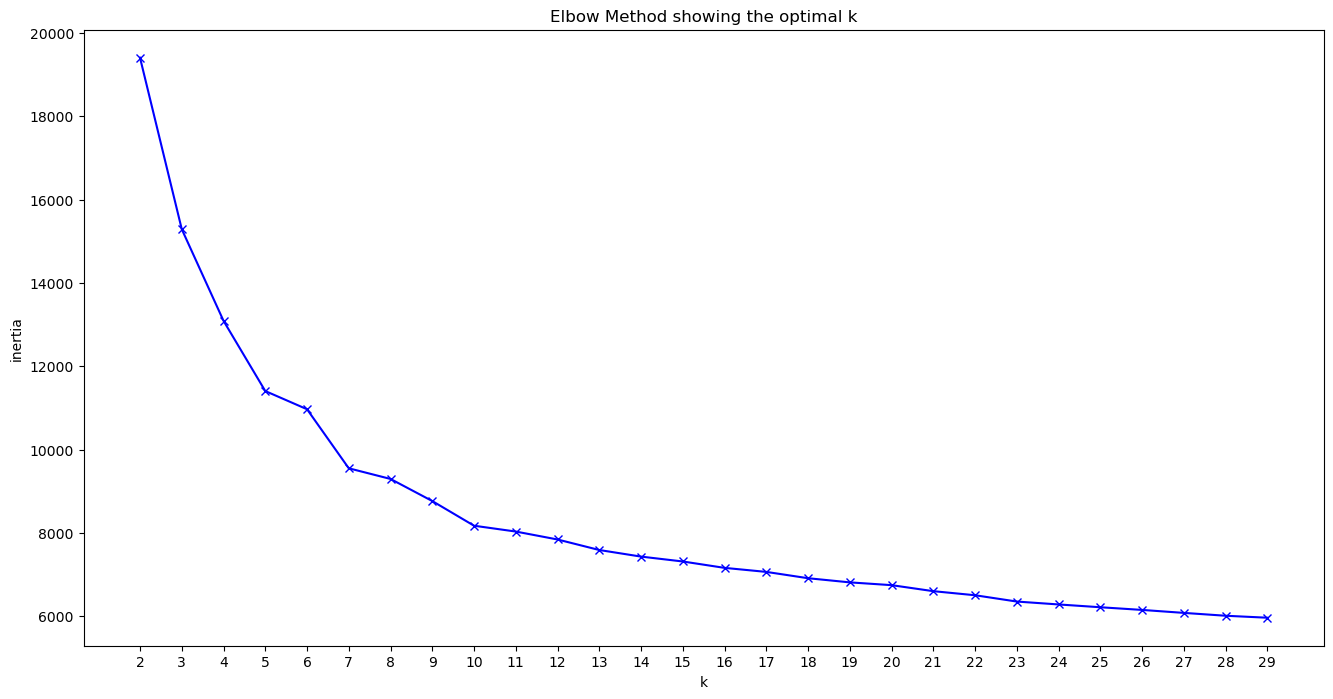

In [292]:
K = range(2, 30)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [186]:
# Agglomeratives Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster

In [298]:
agglomerative = AgglomerativeClustering(n_clusters=10, linkage='ward')
df_scaled['Agglomerativ_Clustering'] = agglomerative.fit_predict(df_scaled[['danceability', 'energy', 'key', 'loudness', 
                  'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']])

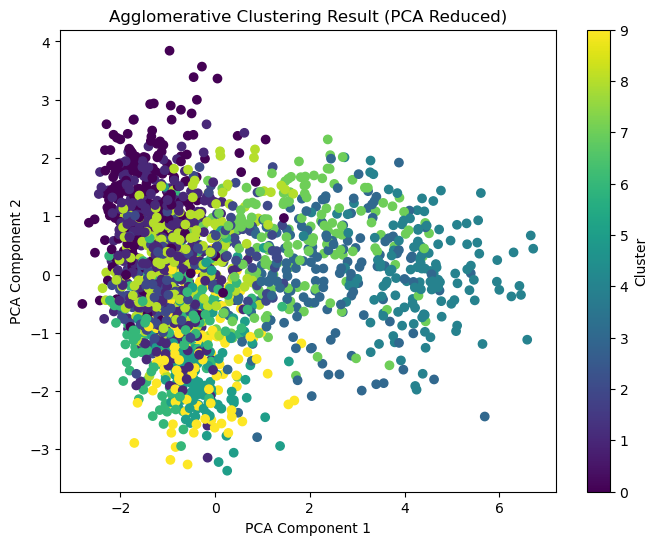

In [302]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# PCA for Dimensionreduxtion 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled[['danceability', 'energy', 'key', 'loudness', 
                  'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']])
df_scaled['Agglomerativ_Clustering'] = agglomerative.labels_

# Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_scaled['Agglomerativ_Clustering'], cmap='viridis')
plt.title('Agglomerative Clustering Result (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [304]:
# DBSCAN
from sklearn.cluster import DBSCAN

In [312]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
df_scaled['DBSCAN'] = dbscan.fit_predict(df_scaled[['danceability', 'energy', 'key', 'loudness', 
                  'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']])

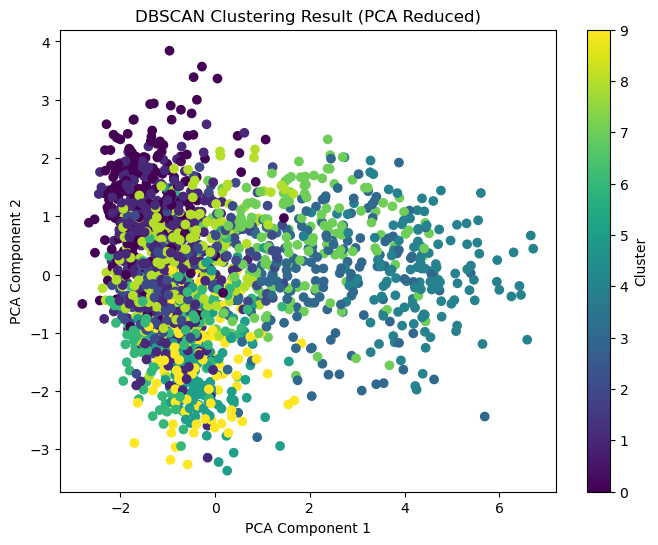

In [314]:
# PCA for Dimensionreduxtion 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled[['danceability', 'energy', 'key', 'loudness', 
                  'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo']])
df_scaled['DBSCAN'] = agglomerative.labels_

# Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_scaled['DBSCAN'], cmap='viridis')
plt.title('DBSCAN Clustering Result (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()